In [2]:
import numpy as np
import re
import pandas as pd
import edlib
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os

In [2]:
sample_path = '/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/individual_cells/CRISPResso_output/'
amp_list =[x[1] for x in os.walk(sample_path)][0]
sample_path + amp_list[0]

for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP', '')))):
    CRISPResso_batch_path = sample_path + amp
    all_indels = []
    cell_names = []
    cells = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:

            cells += 1
            cell_names += [x[0].replace(CRISPResso_batch_path + '/CRISPResso_on_', '')]
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        all_indels += [int(item[0])]
                except:
                    pass
#    print(min(all_indels))
#    print(max(all_indels))
#    for num in range(min(all_indels), max(all_indels)):
#        print(num)
    mat_rows = max(all_indels) - min(all_indels) + 1
    indel_matrix = np.zeros((cells, mat_rows))
    cell_number = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            to_add = []
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        to_add += [item]
                except:
                    pass
            for indel_size in to_add:
                c_index = int(indel_size[0]) - min(all_indels)
                indel_matrix[cell_number, c_index] = int(indel_size[1])
            cell_number += 1
    cell = 0
    total_cells = 0
    edited_cells = 0
    unedited_cells = 0
    ambiguous_cells = 0
    edited_reads = 0
    unedited_reads = 0
    for row in indel_matrix:
        if sum(row) >= 5:
            indel = 0
            unedited = 0
            for edit_length in np.nonzero(row)[0]:
                if (edit_length + min(all_indels)) != 0:
                    indel += indel_matrix[(cell, edit_length)]
                    edited_reads += indel_matrix[(cell, edit_length)]
                elif (edit_length + min(all_indels)) == 0:
                    unedited += indel_matrix[(cell, edit_length)]
                    unedited_reads += indel_matrix[(cell, edit_length)]
            if indel/sum(row) >= 0.8:
                edited_cells += 1
            elif unedited/sum(row) > 0.8:
                unedited_cells += 1
            else:
                ambiguous_cells += 1
            total_cells += 1
        cell += 1
    
    print(amp)
    if total_cells == 0:
        print('no qualified cells in expt')
    else:
        print('total qualified cells in expt', total_cells)
        print('total unqualified cells', cells - total_cells)
        print('total edited cells', edited_cells, edited_cells/total_cells)
        print('total unedited cells', unedited_cells, unedited_cells/total_cells)
        print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
        print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))
    print()
    


CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP55
total qualified cells in expt 1589
total unqualified cells 544
total edited cells 906 0.5701699181875394
total unedited cells 248 0.15607300188797987
total 'heterozygous' cells 435 0.2737570799244808
percent edited reads 0.7072474278203327

CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP58
total qualified cells in expt 986
total unqualified cells 766
total edited cells 26 0.02636916835699797
total unedited cells 752 0.7626774847870182
total 'heterozygous' cells 208 0.21095334685598377
percent edited reads 0.13587282543491302



In [3]:
sample_path = '/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/tube2/individual_cells/CRISPResso_output/'
amp_list =[x[1] for x in os.walk(sample_path)][0]
sample_path + amp_list[0]

for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP', '')))):
    CRISPResso_batch_path = sample_path + amp
    all_indels = []
    cell_names = []
    cells = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:

            cells += 1
            cell_names += [x[0].replace(CRISPResso_batch_path + '/CRISPResso_on_', '')]
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        all_indels += [int(item[0])]
                except:
                    pass
#    print(min(all_indels))
#    print(max(all_indels))
#    for num in range(min(all_indels), max(all_indels)):
#        print(num)
    mat_rows = max(all_indels) - min(all_indels) + 1
    indel_matrix = np.zeros((cells, mat_rows))
    cell_number = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            to_add = []
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        to_add += [item]
                except:
                    pass
            for indel_size in to_add:
                c_index = int(indel_size[0]) - min(all_indels)
                indel_matrix[cell_number, c_index] = int(indel_size[1])
            cell_number += 1
    cell = 0
    total_cells = 0
    edited_cells = 0
    unedited_cells = 0
    ambiguous_cells = 0
    edited_reads = 0
    unedited_reads = 0
    for row in indel_matrix:
        if sum(row) >= 5:
            indel = 0
            unedited = 0
            for edit_length in np.nonzero(row)[0]:
                if (edit_length + min(all_indels)) != 0:
                    indel += indel_matrix[(cell, edit_length)]
                    edited_reads += indel_matrix[(cell, edit_length)]
                elif (edit_length + min(all_indels)) == 0:
                    unedited += indel_matrix[(cell, edit_length)]
                    unedited_reads += indel_matrix[(cell, edit_length)]
            if indel/sum(row) >= 0.8:
                edited_cells += 1
            elif unedited/sum(row) > 0.8:
                unedited_cells += 1
            else:
                ambiguous_cells += 1
            total_cells += 1
        cell += 1
    
    print(amp)
    if total_cells == 0:
        print('no qualified cells in expt')
    else:
        print('total qualified cells in expt', total_cells)
        print('total unqualified cells', cells - total_cells)
        print('total edited cells', edited_cells, edited_cells/total_cells)
        print('total unedited cells', unedited_cells, unedited_cells/total_cells)
        print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
        print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))
    print()
    


CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP55
total qualified cells in expt 2330
total unqualified cells 185
total edited cells 1348 0.5785407725321888
total unedited cells 334 0.14334763948497853
total 'heterozygous' cells 648 0.27811158798283264
percent edited reads 0.7181037225580655

CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP58
total qualified cells in expt 1295
total unqualified cells 658
total edited cells 53 0.040926640926640924
total unedited cells 945 0.7297297297297297
total 'heterozygous' cells 297 0.22934362934362934
percent edited reads 0.15208551179272686



In [8]:
sample_path = '/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/combined_tubes/'
amp_list =[x[1] for x in os.walk(sample_path)][0]
sample_path + amp_list[0]

for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP', '')))):
    CRISPResso_batch_path = sample_path + amp
    all_indels = []
    cell_names = []
    cells = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:

            cells += 1
            cell_names += [x[0].replace(CRISPResso_batch_path + '/CRISPResso_on_', '')]
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        all_indels += [int(item[0])]
                except:
                    pass
#    print(min(all_indels))
#    print(max(all_indels))
#    for num in range(min(all_indels), max(all_indels)):
#        print(num)
    mat_rows = max(all_indels) - min(all_indels) + 1
    indel_matrix = np.zeros((cells, mat_rows))
    cell_number = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            to_add = []
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        to_add += [item]
                except:
                    pass
            for indel_size in to_add:
                c_index = int(indel_size[0]) - min(all_indels)
                indel_matrix[cell_number, c_index] = int(indel_size[1])
            cell_number += 1
    cell = 0
    total_cells = 0
    edited_cells = 0
    unedited_cells = 0
    ambiguous_cells = 0
    edited_reads = 0
    unedited_reads = 0
    for row in indel_matrix:
        if sum(row) >= 5:
            indel = 0
            unedited = 0
            for edit_length in np.nonzero(row)[0]:
                if (edit_length + min(all_indels)) != 0:
                    indel += indel_matrix[(cell, edit_length)]
                    edited_reads += indel_matrix[(cell, edit_length)]
                elif (edit_length + min(all_indels)) == 0:
                    unedited += indel_matrix[(cell, edit_length)]
                    unedited_reads += indel_matrix[(cell, edit_length)]
            if indel/sum(row) >= 0.8:
                edited_cells += 1
            elif unedited/sum(row) > 0.8:
                unedited_cells += 1
            else:
                ambiguous_cells += 1
            total_cells += 1
        cell += 1
    
    print(amp)
    if total_cells == 0:
        print('no qualified cells in expt')
    else:
        print('total qualified cells in expt', total_cells)
        print('total biallelic edited cells', edited_cells, edited_cells/total_cells)
        print('total monoallelic cells', ambiguous_cells, ambiguous_cells/total_cells)
        print('total unedited cells', unedited_cells, unedited_cells/total_cells)
        print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))
    print()
    


CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP55
total qualified cells in expt 3914
total biallelic edited cells 2249 0.5746039856923864
total monoallelic cells 1083 0.2766990291262136
total unedited cells 582 0.1486969851814001
percent edited reads 0.7153090889144863

CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP58
total qualified cells in expt 2280
total biallelic edited cells 79 0.03464912280701754
total monoallelic cells 505 0.22149122807017543
total unedited cells 1696 0.743859649122807
percent edited reads 0.14614423288980372



In [5]:
sample_path = '/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/combined_tubes/'
output_path = '/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/'
amp_list =[x[1] for x in os.walk(sample_path)][0]
sample_path + amp_list[0]

for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP', '')))):
    CRISPResso_batch_path = sample_path + amp
    all_indels = []
    cell_names = []
    cells = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            cells += 1
            cell_names += [x[0].replace(CRISPResso_batch_path + '/CRISPResso_on_', '')]
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        all_indels += [int(item[0])]
                except:
                    pass
    mat_rows = max(all_indels) - min(all_indels) + 1
    indel_matrix = np.zeros((cells, mat_rows))
    indel_sizes = list(range(min(all_indels), max(all_indels)+1))
    cell_number = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            to_add = []
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        to_add += [item]
                except:
                    pass
            for indel_size in to_add:
                c_index = int(indel_size[0]) - min(all_indels)
                indel_matrix[cell_number, c_index] = int(indel_size[1])
            cell_number += 1
    
    indel_df = pd.DataFrame(indel_matrix, index=cell_names, columns=indel_sizes)
    indel_df.to_csv(output_path + amp + '.csv', index=True, header=True, sep=',')

In [6]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)
common = amp1.index.intersection(amp2.index)
total_cells = 0

amp1bi_amp2bi = 0
amp1bi_amp2mono = 0
amp1bi_amp2unedited = 0
amp1mono_amp2bi = 0
amp1mono_amp2mono = 0
amp1mono_amp2unedited = 0
amp1unedited_amp2bi = 0
amp1unedited_amp2mono = 0
amp1unedited_amp2unedited = 0


for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                amp1bi_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1bi_amp2unedited += 1
            else:
                amp1bi_amp2mono += 1
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                amp1unedited_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1unedited_amp2unedited += 1
            else:
                amp1unedited_amp2mono += 1              
        else:
            if amp2_edit_percent >= 0.8:
                amp1mono_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1mono_amp2unedited += 1
            else:
                amp1mono_amp2mono += 1

print(f'''There are {total_cells} cells that contain sufficient reads at both loci.
      CXCR4 biallelic/CCR5 biallelic {amp1bi_amp2bi} {amp1bi_amp2bi/total_cells:.4f}
      CXCR4 biallelic/CCR5 monoallelic {amp1bi_amp2mono} {amp1bi_amp2mono/total_cells:.4f}
      CXCR4 biallelic/CCR5 unedited {amp1bi_amp2unedited} {amp1bi_amp2unedited/total_cells:.4f}
      
      CXCR4 monoallelic/CCR5 biallelic {amp1mono_amp2bi} {amp1mono_amp2bi/total_cells:.4f}
      CXCR4 monoallelic/CCR5 monoallelic {amp1mono_amp2mono} {amp1mono_amp2mono/total_cells:.4f}
      CXCR4 monoallelic/CCR5 unedited {amp1mono_amp2unedited} {amp1mono_amp2unedited/total_cells:.4f}
      
      CXCR4 unedited/CCR5 biallelic {amp1unedited_amp2bi} {amp1unedited_amp2bi/total_cells:.4f}
      CXCR4 unedited/CCR5 monoallelic {amp1unedited_amp2mono} {amp1unedited_amp2mono/total_cells:.4f}
      CXCR4 unedited/CCR5 unedited {amp1unedited_amp2unedited} {amp1unedited_amp2unedited/total_cells:.4f}''')


        
        
        
        

There are 2122 cells that contain sufficient reads at both loci.
      CXCR4 biallelic/CCR5 biallelic 65 0.0306
      CXCR4 biallelic/CCR5 monoallelic 279 0.1315
      CXCR4 biallelic/CCR5 unedited 865 0.4076
      
      CXCR4 monoallelic/CCR5 biallelic 6 0.0028
      CXCR4 monoallelic/CCR5 monoallelic 125 0.0589
      CXCR4 monoallelic/CCR5 unedited 454 0.2139
      
      CXCR4 unedited/CCR5 biallelic 3 0.0014
      CXCR4 unedited/CCR5 monoallelic 34 0.0160
      CXCR4 unedited/CCR5 unedited 291 0.1371


In [3]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)
common = amp1.index.intersection(amp2.index)

amp1_name = 'CXCR4'
amp2_name = 'CCR5'

edit_percents = []

for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5:
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        
        edit_percents += [[cell, amp1_edit_percent, amp2_edit_percent]]


        

In [4]:
green_purple = sns.diverging_palette(300, 125, l=30, as_cmap=True)

In [5]:
custom_greens = sns.light_palette((125, 100, 30), input='husl', as_cmap=True)

In [6]:
output_data = pd.DataFrame(edit_percents, columns = ['Name', 'CXCR4', 'CCR5'])

In [7]:
bins = pd.IntervalIndex.from_tuples([(-0.001, 0.2), (0.2, 0.8), (0.8, 1.0)])

In [8]:
output_data['CXCR4 bins'] = pd.cut(output_data['CXCR4'], bins)
output_data['CCR5 bins'] = pd.cut(output_data['CCR5'], bins)

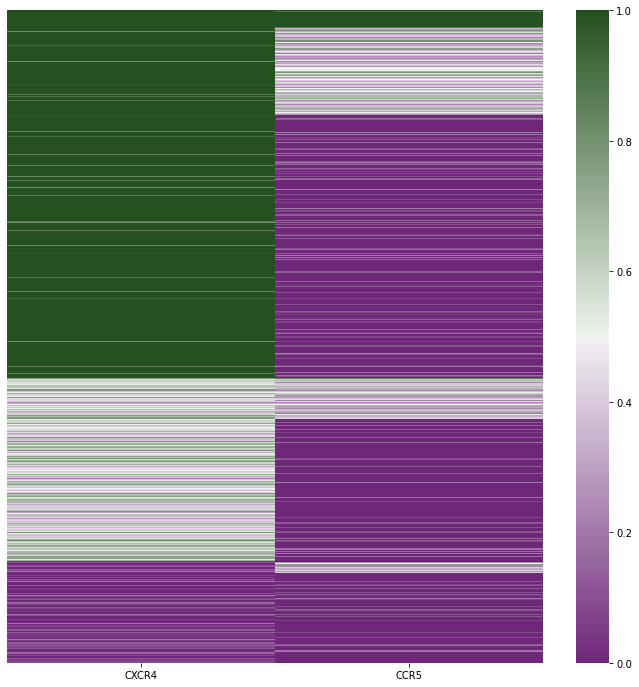

In [13]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=green_purple, yticklabels=False)


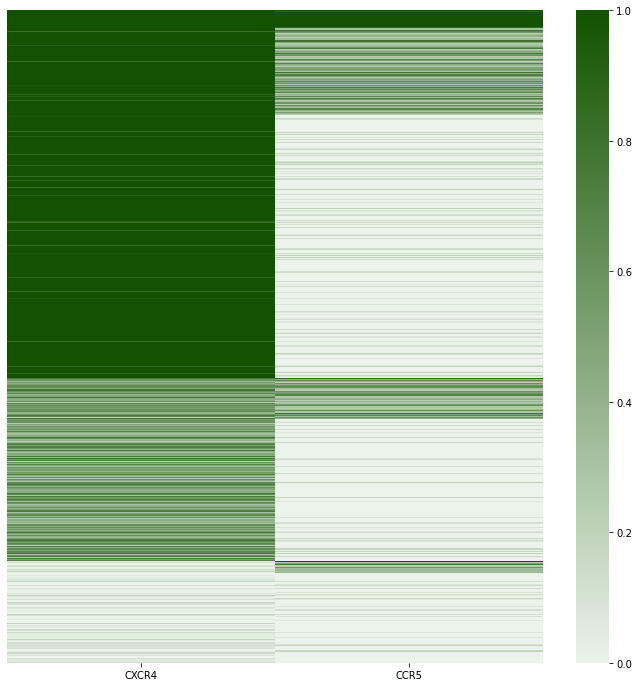

In [10]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=custom_greens, yticklabels=False)


In [26]:
output_data['CXCR4 cat'] = [x.right - 0.1 if x.right == 0.8 else x.right + 0.3 if x.right == 0.2 else x.right for x in output_data['CXCR4 bins']]
output_data['CCR5 cat'] = [x.right - 0.1 if x.right == 0.8 else x.right + 0.3 if x.right == 0.2 else x.right for x in output_data['CCR5 bins']]

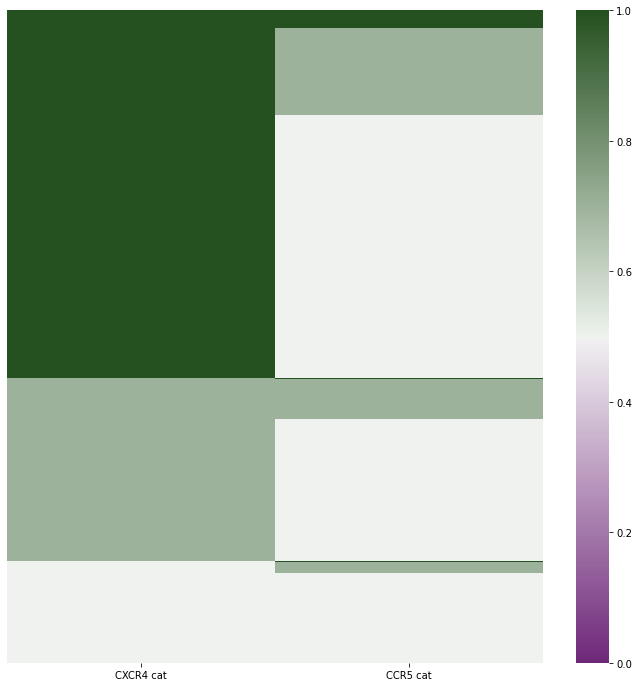

In [27]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', 'CXCR4', 'CCR5', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=green_purple, vmin=0, vmax=1, yticklabels=False)


In [20]:
output_data['CXCR4 cat'] = [x.right - 0.2 if x.right == 0.8 else x.right - 0.2 if x.right == 0.2 else x.right for x in output_data['CXCR4 bins']]
output_data['CCR5 cat'] = [x.right - 0.2 if x.right == 0.8 else x.right - 0.2 if x.right == 0.2 else x.right for x in output_data['CCR5 bins']]

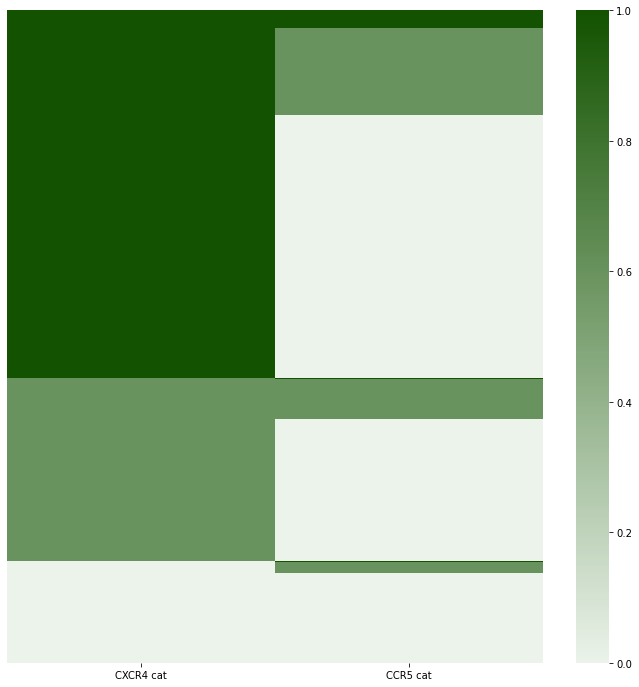

In [21]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', 'CXCR4', 'CCR5', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=custom_greens, vmin=0, vmax=1, yticklabels=False)


In [28]:
output_data

,Name,CXCR4,CCR5,CXCR4 bins,CCR5 bins,CXCR4 cat,CCR5 cat
0,TGAGTATCGCGACAGA,0.500000,0.250000,"(0.2, 0.8]","(0.2, 0.8]",0.7,0.7
1,ACAGGAGTCTCTCGCA,1.000000,0.000000,"(0.8, 1.0]","(-0.001, 0.2]",1.0,0.5
2,TAGGAGAAACGAGAGG,0.000000,0.000000,"(-0.001, 0.2]","(-0.001, 0.2]",0.5,0.5
3,CGGTTCAAAGGACCAA,1.000000,0.000000,"(0.8, 1.0]","(-0.001, 0.2]",1.0,0.5
4,GTGCAGAAGATGACGG,0.923077,0.100000,"(0.8, 1.0]","(-0.001, 0.2]",1.0,0.5
...,...,...,...,...,...,...,...
2117,TCTGCTCAGACCTAGG,0.111111,0.000000,"(-0.001, 0.2]","(-0.001, 0.2]",0.5,0.5
2118,GTCGTCCGCAACGGTC,0.777778,0.285714,"(0.2, 0.8]","(0.2, 0.8]",0.7,0.7
2119,CGGTAACTAGTCCGTA,1.000000,0.000000,"(0.8, 1.0]","(-0.001, 0.2]",1.0,0.5
2120,ACCGGCCTGCAGAAGG,1.000000,0.000000,"(0.8, 1.0]","(-0.001, 0.2]",1.0,0.5
